In [1]:
import numpy as np
import pandas as pd

from Replayers import ABTestReplayer, EpsilonGreedyReplayer, ThompsonSamplingReplayer

# Load historical data

In [6]:
rating_df = pd.read_csv('top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')
rating_df.head()

,user_id,movie_id,rating,movie_title
0,185,301,3,L.A. Confidential (1997)
1,61,256,2,Men in Black (1997)
2,199,221,5,Star Trek: First Contact (1996)
3,290,117,2,Twister (1996)
4,307,0,4,Toy Story (1995)


In [10]:
rating_df.movie_id.nunique()

50

## Translate ratings into a binary reward value

In [15]:
reward_threshold = 4
rating_df['reward'] = rating_df.eval('rating > @reward_threshold').astype(int)
rating_df.head()

,user_id,movie_id,rating,movie_title,reward
0,185,301,3,L.A. Confidential (1997),0
1,61,256,2,Men in Black (1997),0
2,199,221,5,Star Trek: First Contact (1996),1
3,290,117,2,Twister (1996),0
4,307,0,4,Toy Story (1995),0


# Set the parameters for the simulations

In [16]:
n_visits = 20000
n_iterations = 20

reward_history = rating_df
item_col_name = 'movie_id'
visitor_col_name = 'user_id'
reward_col_name = 'reward'

# A/B Test Simulations

## Test period = 1,000 visits

### Run the test

In [17]:
n_test_visits = 1000
ab_1k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()

100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [3:25:42<00:00, 1742.44s/it]


In [18]:
ab_1k_results_df = pd.DataFrame(ab_1k_results)
ab_1k_results_df.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.000000,21,0,0,0,0,268
1,0.000000,256,0,0,0,1,140
2,0.333333,175,0,1,1,2,113
3,0.500000,404,0,1,2,3,933
4,0.400000,120,0,0,2,4,930


### Save the output

In [20]:
ab_1k_results_df.to_csv('ab_test_1k.csv')

## Test period = 5,000 visits

### Run the test

In [23]:
n_test_visits = 5000
ab_5k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()



  0%|                                                                                                                                               | 0/20 [00:00<?, ?it/s]

  5%|██████▋                                                                                                                               | 1/20 [02:58<56:26, 178.24s/it]

 10%|█████████████▍                                                                                                                        | 2/20 [05:52<53:06, 177.05s/it]

 15%|████████████████████                                                                                                                  | 3/20 [07:32<43:34, 153.80s/it]

 20%|██████████████████████████▊                                                                                                           | 4/20 [10:13<41:37, 156.11s/it]

 25%|█████████████████████████████████▌                                                                                              

In [24]:
ab_5k_results_df = pd.DataFrame(ab_5k_results)
ab_5k_results_df.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.000000,21,0,0,0,0,268
1,0.000000,256,0,0,0,1,140
2,0.333333,175,0,1,1,2,113
3,0.500000,404,0,1,2,3,933
4,0.400000,120,0,0,2,4,930


### Save the output

In [25]:
ab_5k_results_df.to_csv('ab_test_5k.csv')

# $\epsilon$-Greedy Simulations

## $\epsilon$ = 0.05

### Run the test

In [26]:
epsilon = 0.05
epsilon_05_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()



  0%|                                                                                                                                               | 0/20 [00:00<?, ?it/s]

  5%|██████▋                                                                                                                               | 1/20 [02:47<53:07, 167.78s/it]

 10%|█████████████▍                                                                                                                        | 2/20 [04:18<43:21, 144.53s/it]

 15%|████████████████████                                                                                                                  | 3/20 [07:03<42:41, 150.67s/it]

 20%|██████████████████████████▊                                                                                                           | 4/20 [09:58<42:12, 158.25s/it]

 25%|█████████████████████████████████▌                                                                                              

In [27]:
epsilon_05_results_df = pd.DataFrame(epsilon_05_results)
epsilon_05_results_df.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.00,301,0,0,0,0,268
1,0.00,301,0,0,0,1,656
2,0.00,301,0,0,0,2,933
3,0.25,301,0,1,1,3,333
4,0.40,301,0,1,2,4,835


### Save the output

In [28]:
epsilon_05_results_df.to_csv('epsilon_greedy_05.csv')

## $\epsilon$ = 0.10

### Run the test

In [29]:
epsilon = 0.10
epsilon_10_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()



  0%|                                                                                                                                               | 0/20 [00:00<?, ?it/s]

  5%|██████▋                                                                                                                               | 1/20 [02:57<56:15, 177.68s/it]

 10%|█████████████▍                                                                                                                        | 2/20 [05:21<50:16, 167.59s/it]

 15%|████████████████████                                                                                                                  | 3/20 [08:05<47:08, 166.38s/it]

 20%|██████████████████████████▊                                                                                                           | 4/20 [10:59<45:01, 168.86s/it]

 25%|█████████████████████████████████▌                                                                                              

In [30]:
epsilon_10_results_df = pd.DataFrame(epsilon_10_results)
epsilon_10_results_df.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.00,301,0,0,0,0,268
1,0.00,301,0,0,0,1,656
2,0.00,301,0,0,0,2,933
3,0.25,301,0,1,1,3,333
4,0.40,301,0,1,2,4,835


### Save the output

In [31]:
epsilon_10_results_df.to_csv('epsilon_greedy_10.csv')

# Thompson Sampling Simulations

### Run the test

In [32]:
# thompson_results = ThompsonSamplingReplayer(n_visits, reward_history,
#                                             item_col_name, visitor_col_name, reward_col_name,
#                                             n_iterations=n_iterations).replay()

In [33]:
#thompson_results_df = pd.DataFrame(thompson_results)
# thompson_results_df.head()

### Save the output

In [34]:
#thompson_results_df.to_csv('thompson_sampling.csv')

In [35]:
thompson_results_df = pd.read_csv('thompson_sampling.csv').drop(columns='Unnamed: 0')

# Compare the results

## Average the results across all runs

In [36]:
ab_1k_avg_results_df = ab_1k_results_df.groupby('visit', as_index=False).mean()

ab_5k_avg_results_df = ab_5k_results_df.groupby('visit', as_index=False).mean()

epsilon_05_avg_results_df = epsilon_05_results_df.groupby('visit', as_index=False).mean()

epsilon_10_avg_results_df = epsilon_10_results_df.groupby('visit', as_index=False).mean()

thompson_avg_results_df = thompson_results_df.groupby('visit', as_index=False).mean()

## Plot the output

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
sns.set(font_scale=2.5)

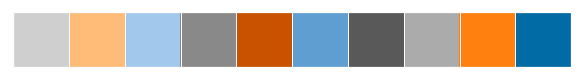

In [39]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

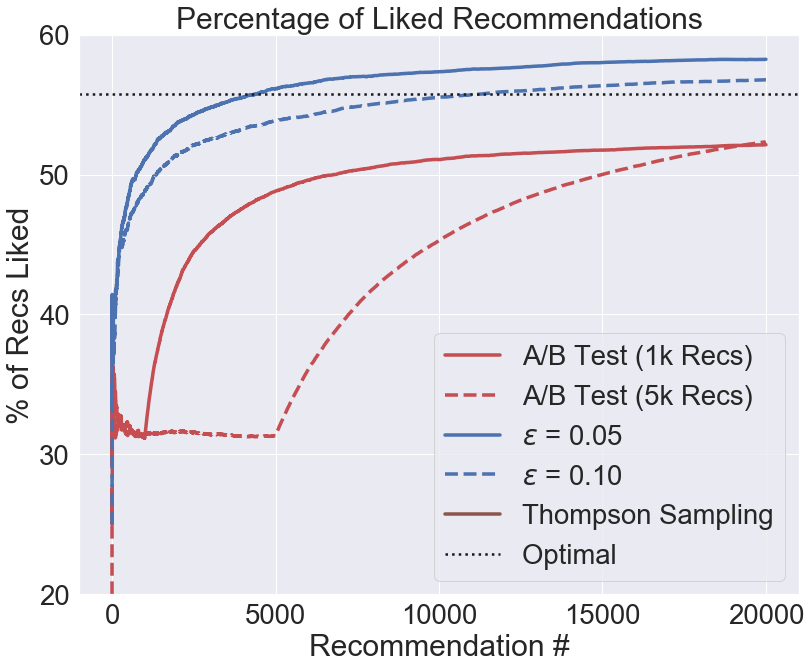

In [40]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df, style) in [(ab_1k_avg_results_df, 'r-'),
                                (ab_5k_avg_results_df, 'r--'),
                                (epsilon_05_avg_results_df, 'b-'),
                                (epsilon_10_avg_results_df, 'b--'),
                                (thompson_avg_results_df, 'tab:brown')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)

# add a line for the optimal value -- 0.5575 for Star Wars (from exploration noteboook)
ax.axhline(y=0.5575, color='k', linestyle=':', linewidth=2.5)

ax.set_title('Percentage of Liked Recommendations')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recs Liked')

ax.set_xticks(range(0,22000,5000))
ax.set_ylim(0.2, 0.6)
ax.set_yticks(np.arange(0.2, 0.7, 0.1))

# rescale the y-axis tick labels to show them as a percentage
ax.set_yticklabels((ax.get_yticks()*100).astype(int))

ax.legend(['A/B Test (1k Recs)',
           'A/B Test (5k Recs)',
           '$\epsilon$ = 0.05',
           '$\epsilon$ = 0.10',
           'Thompson Sampling',
           'Optimal '
          ],
          loc='lower right'
         )

plt.tight_layout()
plt.show()